In [27]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect,func

In [30]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [31]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [32]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [35]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [36]:
# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year

datetime.date(2016, 8, 23)

In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
prcp_data = session.query(func.strftime("%Y-%m-%d", Measurement.date), Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()











In [45]:
# Perform a query to retrieve the data and precipitation scores
prcp_score = session.query(Measurement.date,Measurement.prcp).all()


In [46]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

precipitation_df = pd.DataFrame(prcp_data, columns = ['date', 'precipitation'])
precipitation_df.set_index('date', inplace = True)

precipitation_df = precipitation_df.sort_values(by='date')
precipitation_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


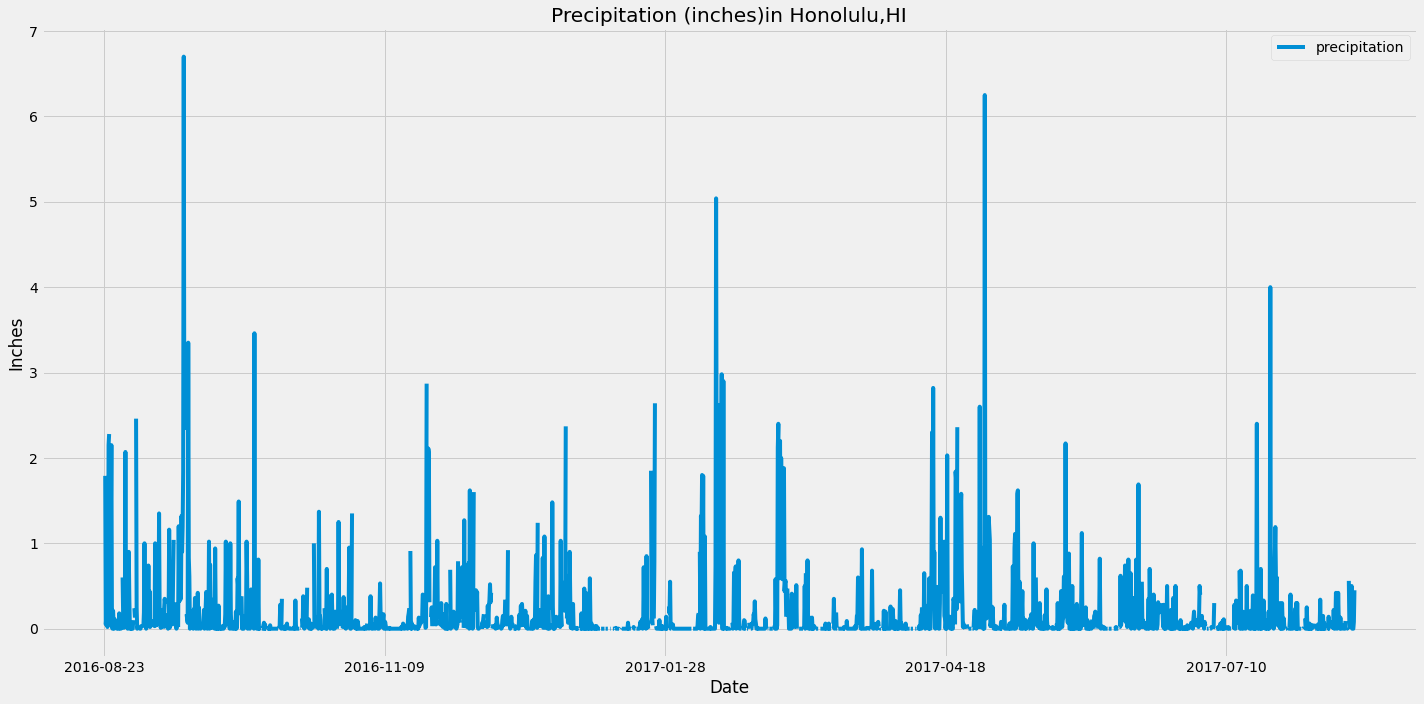

In [47]:
# Use Pandas Plotting with Matplotlib to plot the data
#set the plot and plot the chart

fig, ax = plt.subplots(figsize = (20,10))
precipitation_df.plot(ax = ax, x_compat = True)

#Apply title and labels
ax.set_xlabel('Date')
ax.set_ylabel('Inches')
ax.set_title("Precipitation (inches)in Honolulu,HI")

plt.savefig("Images/precipitation.png")

#plot
plt.tight_layout()
plt.show()

In [48]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [49]:
# Design a query to calculate the total number stations in the dataset
stations = inspector.get_columns('station')
session.query(Station.id).count()

9

In [51]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = [Station.station, func.count(Measurement.station)]
session.query(*active_stations).filter(Station.station == Measurement.station).group_by(Station.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [52]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#Most Active station = ('USC00519281', 2772)
most_active_station = 'USC00519281'
analysis = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()
analysis

[(54.0, 85.0, 71.66378066378067)]

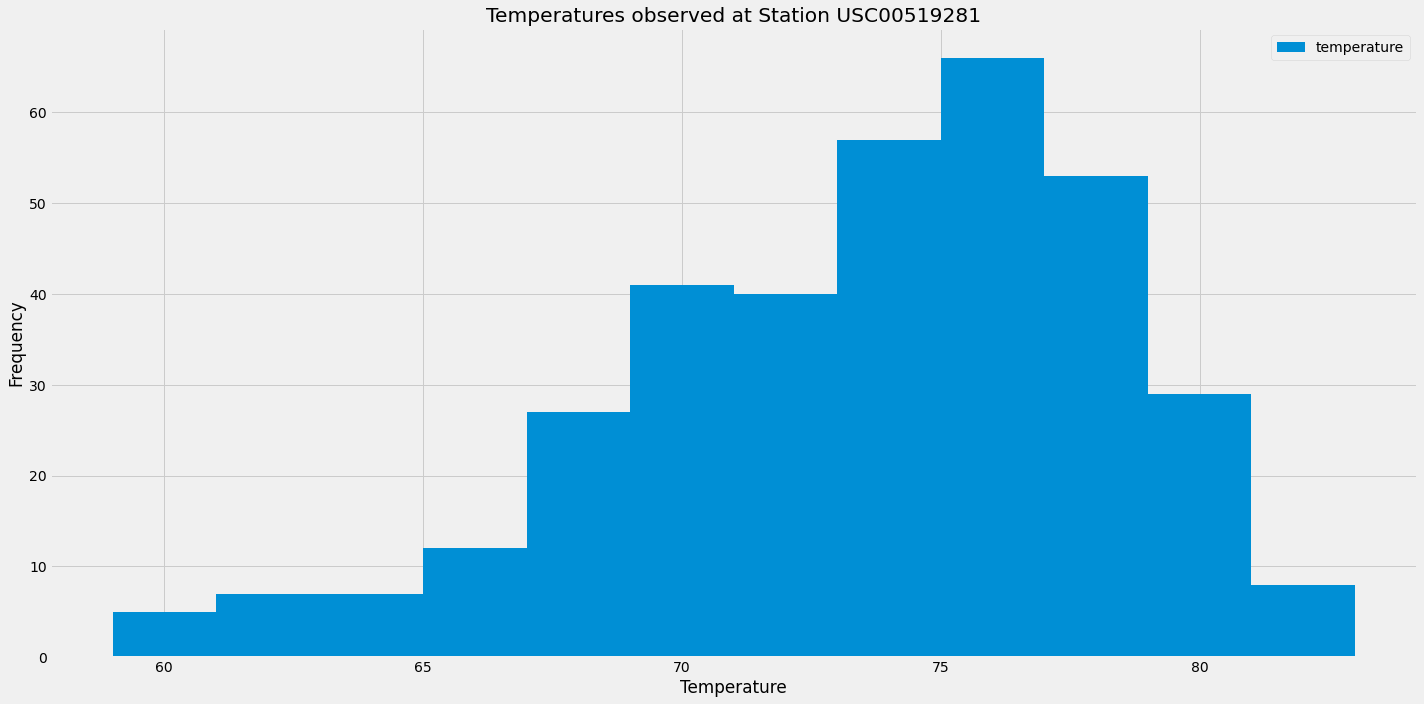

In [56]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()

temp_data_df = pd.DataFrame(temp_data, columns = ['date','temperature'])

fig, ax = plt.subplots(figsize = (20,10))
temp_data_df.plot.hist(bins =12, ax = ax)

ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')
ax.set_title("Temperatures observed at Station USC00519281")

plt.savefig("Images/yearly_plot.png")

#plot
plt.tight_layout()
plt.show()

# Close session

In [57]:
# Close Session
session.close()